In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [54]:
train = pd.read_csv('./data/Train.csv')
test = pd.read_csv('./data/Test.csv')
sample_submission = pd.read_csv('./data/SampleSubmission.csv')
train.shape, test.shape

((373, 12), (558, 11))

In [55]:
train.head(2)

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07


In [56]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PURCHASE_VALUE,373.0,4506.522788,15722.261797,10.0,150.0,690.0,2000.0,150000.0
USER_AGE,61.0,25.803279,1.423841,25.0,25.0,25.0,27.0,32.0
USER_HOUSEHOLD,373.0,2.831099,1.600033,1.0,1.0,3.0,4.0,7.0
USER_INCOME,373.0,146235.924933,166521.780346,8000.0,23000.0,90000.0,200000.0,1000000.0


In [57]:
train.columns

Index(['MERCHANT_CATEGORIZED_AT', 'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS',
       'PURCHASE_VALUE', 'PURCHASED_AT',
       'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_GENDER',
       'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID', 'Transaction_ID'],
      dtype='object')

### Checking and Dealing with Missing Values

In [58]:
# looking for missing entries in our train data
print(train.isnull().any())

MERCHANT_CATEGORIZED_AT                  False
MERCHANT_NAME                            False
MERCHANT_CATEGORIZED_AS                  False
PURCHASE_VALUE                           False
PURCHASED_AT                             False
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    False
USER_AGE                                  True
USER_GENDER                               True
USER_HOUSEHOLD                           False
USER_INCOME                              False
USER_ID                                  False
Transaction_ID                           False
dtype: bool


In [59]:
# looking at the values
print(train.isnull().sum())

MERCHANT_CATEGORIZED_AT                    0
MERCHANT_NAME                              0
MERCHANT_CATEGORIZED_AS                    0
PURCHASE_VALUE                             0
PURCHASED_AT                               0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY      0
USER_AGE                                 312
USER_GENDER                                6
USER_HOUSEHOLD                             0
USER_INCOME                                0
USER_ID                                    0
Transaction_ID                             0
dtype: int64


In [60]:
# Since USER_AGE has more missing values we'll fill those values with the median of the data
user_age_median = np.median(train['USER_AGE'].dropna())
train['USER_AGE'] = train['USER_AGE'].fillna(user_age_median)

test_user_age_median = np.median(test['USER_AGE'].dropna())
test['USER_AGE'] = test['USER_AGE'].fillna(test_user_age_median)

In [61]:
# any missing values:
train.isnull().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
MERCHANT_CATEGORIZED_AS                  0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              6
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [62]:
test.isnull().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              5
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

In [63]:
train['USER_GENDER'].value_counts()

Male      197
Female    170
Name: USER_GENDER, dtype: int64

In [64]:
test['USER_GENDER'].value_counts()

Male      307
Female    246
Name: USER_GENDER, dtype: int64

- We are going to fill in the missing USER_GENDER values with 'Male' as it more common.
- There are definitely better ways of handling missing values.
- [look at](https://towardsdatascience.com/8-methods-for-handling-missing-values-with-python-pandas-842544cdf891?gi=3ad6fb253a7b)

In [65]:
train["USER_GENDER"] = train["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)
test["USER_GENDER"] = test["USER_GENDER"].apply(lambda x: "Male" if pd.isna(x) else x)

In [66]:
train.isnull().sum()

MERCHANT_CATEGORIZED_AT                  0
MERCHANT_NAME                            0
MERCHANT_CATEGORIZED_AS                  0
PURCHASE_VALUE                           0
PURCHASED_AT                             0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
dtype: int64

### Feature Engineering
Some things you can try:
1) Aggregating Categories
- When working with categorical features it's important to ensure that each category has sufficient samples.
- We'll agg the merchant name column.
2) Transforming features
- This might involve creating new features from the categories given.

#### 1) Dealing with the datetime columns


In [67]:
train['MERCHANT_CATEGORIZED_AT']

0      2022-05-04 10:25:50.588042+00
1      2021-10-25 16:18:38.586837+00
2      2022-05-20 14:17:30.917297+00
3      2022-04-12 15:59:14.139347+00
4      2022-05-04 10:24:26.709045+00
                   ...              
368    2021-08-06 11:28:03.723042+00
369    2022-04-12 15:57:05.758311+00
370     2021-12-01 08:33:13.82067+00
371     2021-10-05 12:29:13.14963+00
372    2022-04-12 15:59:14.139347+00
Name: MERCHANT_CATEGORIZED_AT, Length: 373, dtype: object

In [68]:
train['PURCHASED_AT'] = pd.to_datetime(train['PURCHASED_AT'], 
                                            format = '%Y-%m-%dT%H:%M:%S',
                                            errors= 'coerce')
train['MERCHANT_CATEGORIZED_AT'] = pd.to_datetime(train['MERCHANT_CATEGORIZED_AT'],
                                            format = '%Y-%m-%dT%H:%M:%S',
                                            errors= 'coerce')

In [69]:
# ensuring we didn't miss a date
assert train['PURCHASED_AT'].isnull().sum() == 0, 'missing PURCHASED_AT dates'
assert train['MERCHANT_CATEGORIZED_AT'].isnull().sum() == 0, 'missing MERCHANT_CATEGORIZED_AT dates'

#### Now with this what can we do?
- Breaking apart the date to get the year, month, week of year, day of month, hour, minute, second, etc. 
- With this info, we can aggregate the purchases made by the time of day and month.
- With some payments being 'seasonal', perse - rent usually being paid within the first week of the month, school fees being paid at the begining of school term.
- I'll only apply this transformation to the PURCHASE_AT column. 
- I might experiment with MERCHANT_CATEGORIZED_AT column later to see if it improves my cv scores.

In [70]:
# PURCHASED_AT features
train['PURCHASEDAT_YEAR'] = train['PURCHASED_AT'].dt.year
train['PURCHASEDAT_MONTH'] = train['PURCHASED_AT'].dt.month
train['PURCHASEDAT_WEEK'] = train['PURCHASED_AT'].dt.week
train['PURCHASEDAT_DAY'] = train['PURCHASED_AT'].dt.day
train['PURCHASEDAT_HOUR'] = train['PURCHASED_AT'].dt.hour
train['PURCHASEDAT_MINUTE'] = train['PURCHASED_AT'].dt.minute
train['PURCHASEDAT_DAYOFWEEK'] = train['PURCHASED_AT'].dt.dayofweek

##### Exploring our dates a bit

In [71]:
train.groupby('PURCHASEDAT_YEAR').size()

PURCHASEDAT_YEAR
2018      1
2019     17
2020     12
2021    158
2022    185
dtype: int64

In [72]:
train.groupby('PURCHASEDAT_MONTH').size()

PURCHASEDAT_MONTH
1     19
2     16
3     44
4     58
5     46
6     27
7     10
8     23
9     44
10    44
11    24
12    18
dtype: int64

In [73]:
train.groupby('PURCHASEDAT_DAYOFWEEK').size()

PURCHASEDAT_DAYOFWEEK
0    51
1    46
2    63
3    67
4    57
5    44
6    45
dtype: int64

In [77]:
train.groupby('PURCHASEDAT_DAY').size().sort_index()

PURCHASEDAT_DAY
1      9
2     24
3     14
4     14
5     13
6     16
7     10
8     13
9     10
10     7
11    11
12    14
13    10
14    14
15    12
16     7
17     9
18    12
19    16
20    10
21    13
22    11
23    15
24     9
25     8
26     9
27    14
28    12
29    17
30    12
31     8
dtype: int64

- Most of the purchases year were recorded in 2021 and 2022. This might due to the fact that the company was founded in 2021.
- I will not be using this as a feature.
- There seems to be a spike in number of months at the end of each quarter.
- The rest of the purchases are quite well distributed throughout the days of the weeks.
- Certain times of the year will tend to have a different impact in amount spent on expenditure and the type of expenditure.
- I will investigate this further.
- We also see a spike in purchases made in the first 9 days of the month.

I will create a new column 'PAID_AT'. This will represent the time of day the purchases were made.


In [78]:
time_bins = [0, 6, 12, 18, 23]
time_labels = ['night', 'morning', 'afternoon', 'evening']
train['PAID_AT'] = pd.cut(train['PURCHASEDAT_HOUR'], bins=time_bins, labels=time_labels, right=False)
train['PAID_AT'] = train['PAID_AT'].astype('object') # ensure this is an object column

In [79]:
train.groupby('PAID_AT').size()

PAID_AT
afternoon    158
evening       35
morning      154
night         26
dtype: int64

Most of the purchases have been made in the afternoon and in the morning.   
We'll to explore of this later on.

### EDA For Classification

1) Box Plots  
- Leveraging the graphical representation of box plots to better   
understand the locality, spread and skewness of the groups of numerical data through their quantiles.


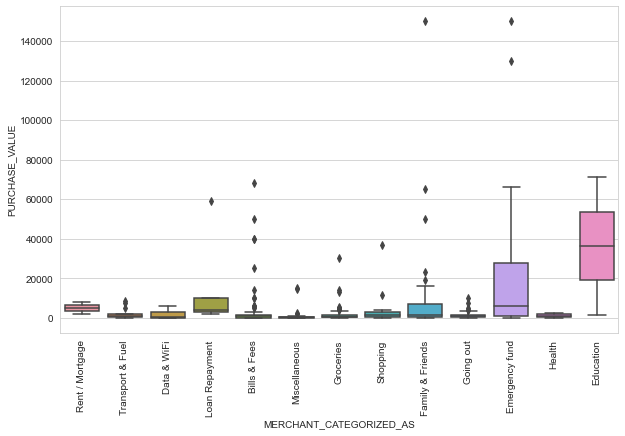

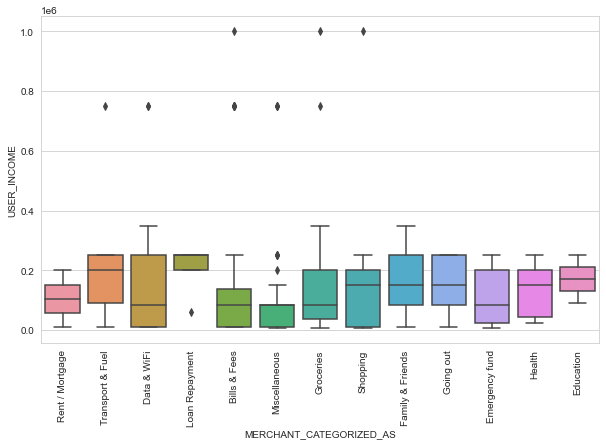

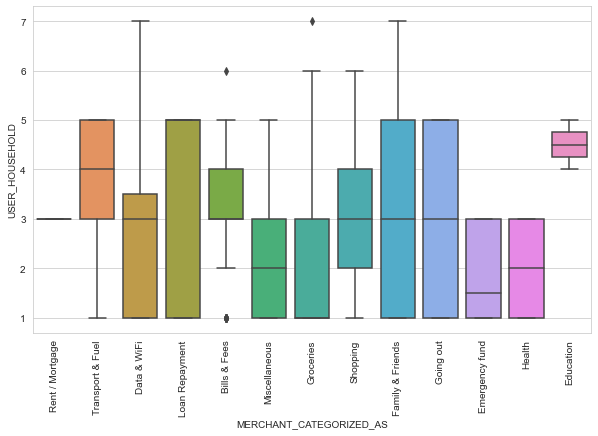

In [80]:
numeric_columns = ['PURCHASE_VALUE', 'USER_INCOME', 'USER_HOUSEHOLD']

def plot_box(train, cols, col_x = 'MERCHANT_CATEGORIZED_AS'):
    for col in cols:
        plt.figure(figsize=(10, 6))
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=train)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.tick_params(axis='x', rotation=90)
        plt.show()

plot_box(train, numeric_columns)

#### Take-aways from our box plots:

##### Violin plots
- Violin plots can be considered as a combination of the box plots and the kernel density plots.
- Violin plots gain an advantage over plain box plots by the fact that despite showing the median, interquartile range it also shows the entire distribution of the data.


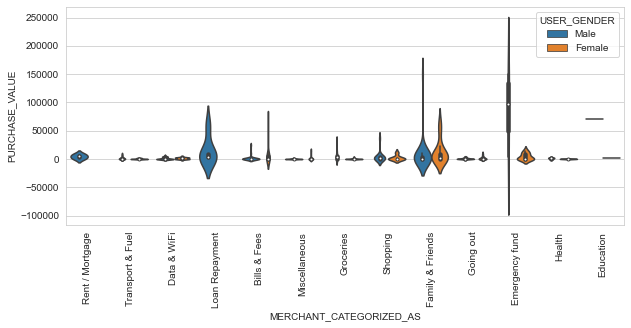

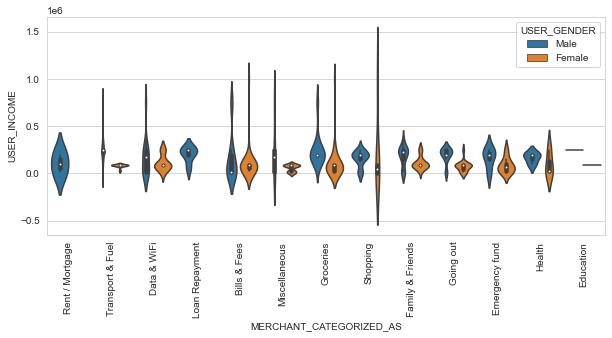

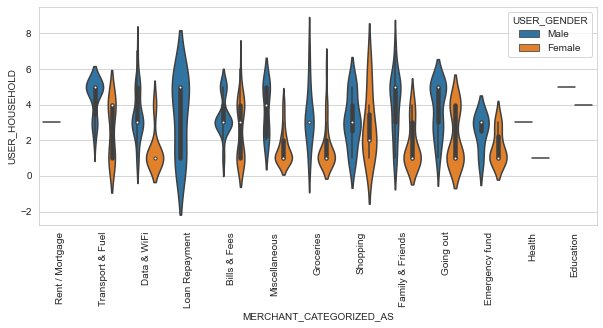

In [81]:
def plot_violin(train, cols, col_x='MERCHANT_CATEGORIZED_AS'):
    for col in cols:
        plt.figure(figsize=(10, 4))
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data=train, hue='USER_GENDER')
        plt.xlabel(col_x)
        plt.tick_params(axis='x', rotation=90)
        plt.ylabel(col)
        plt.show()

plot_violin(train, numeric_columns)

- By separating the plots by gender, we get to see the difference in purchases made by gender.  
- The overall shapes and distribution for 'user income' and 'purchase value' differs with more outliers  in the case of males.
- The overall shape and distribution of the tips for the 'user household' remain similar with the exception of 'Emergency Fund'.   

  Outliers appear to be distributed evenly.  
- Gender seems to be a major feature. 

### class separation by categorical columns
- We'll use frequency tables for this.

In [82]:
def count_unique(train, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(train[col].value_counts())

cat_cols = ['MERCHANT_NAME', 'PURCHASED_AT', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY']
count_unique(train, cat_cols)


For column MERCHANT_NAME
SAFARICOM OFFERS  TUNUKIWA      14
M-SHWARI ACCOUNT                12
SAFARICOM LIMITED               10
PETER KENDA                     10
KPLC PREPAID                     8
                                ..
DENIS OCHIENG OTIENO             1
NELLY BIKUNDO                    1
JAVA AGAKHAN MAIN                1
KRA - NAIROBI COUNTY REVENUE     1
LILIAN OTIENO                    1
Name: MERCHANT_NAME, Length: 218, dtype: int64

For column PURCHASED_AT
2021-10-22 15:49:00+00:00    2
2021-08-04 15:03:00+00:00    2
2021-01-15 15:40:00+00:00    2
2021-08-24 14:53:00+00:00    2
2021-10-11 17:12:00+00:00    2
                            ..
2022-05-31 14:57:00+00:00    1
2022-05-04 13:42:00+00:00    1
2021-09-27 11:18:00+00:00    1
2021-09-21 10:13:00+00:00    1
2021-11-24 10:23:00+00:00    1
Name: PURCHASED_AT, Length: 365, dtype: int64

For column IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY
False    203
True     170
Name: IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY, dtype: in

In [83]:
# let's look at the class imbalance on our dataset
merch_counts = train['MERCHANT_CATEGORIZED_AS'].value_counts()
print(merch_counts)

Bills & Fees        78
Groceries           50
Miscellaneous       43
Data & WiFi         43
Family & Friends    41
Going out           41
Transport & Fuel    29
Shopping            21
Emergency fund      12
Health               6
Loan Repayment       5
Education            2
Rent / Mortgage      2
Name: MERCHANT_CATEGORIZED_AS, dtype: int64


Using a count plot, we'll get to see the relationship between time of day at which the purchases are made and the Merchant category.

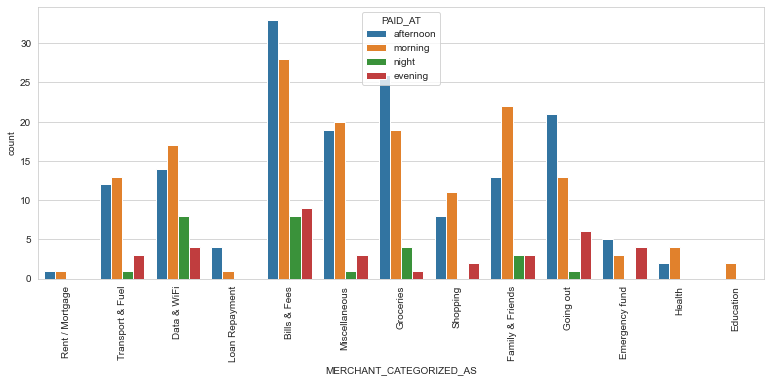

In [90]:
plt.figure(figsize=(13, 5))
sns.countplot(x='MERCHANT_CATEGORIZED_AS', hue='PAID_AT', data=train)
plt.tick_params(axis='x', rotation=90)
plt.show()

##### 2) Data Preparation

In [91]:
# 1) Duplicates - there are no duplicates
print(train.shape)
print(train['Transaction_ID'].unique().shape)

(373, 20)
(373,)


- The 'PURCHASE_VALUE' column will need to be scaled due to the high variance of the data.

- USER_AGE  
The 'USER_AGE' is highly imbalanced. With 350 of the users being 25 and a mere 2 being > 30.   
The age range is also small (25 - 32) so creating a categorical column representing the respective age groups wouldn't make sense.    
The code below recoded the 'USER_AGE' column into fewer categories (just 2 in this case).

In [92]:
age_categories = {25.: '25', 27.:'>25', 26.:'>25', 32.:'>25'}
train['USER_AGE'] = [age_categories[x] for x in train['USER_AGE']]
train['USER_AGE'].value_counts()

25     350
>25     23
Name: USER_AGE, dtype: int64

### Let's look at the spending values of a large household vs smaller household, say only one member.

In [96]:
# Checking the entries of a small household
train[train.loc[:, 'USER_HOUSEHOLD'] == 1]

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,PURCHASEDAT_YEAR,PURCHASEDAT_MONTH,PURCHASEDAT_WEEK,PURCHASEDAT_DAY,PURCHASEDAT_HOUR,PURCHASEDAT_MINUTE,PURCHASEDAT_DAYOFWEEK,PAID_AT
10,2022-03-16 13:08:19.703288+00:00,THREE BINS SERVICES,Bills & Fees,500,2021-09-06 07:47:00+00:00,False,25,Female,1,85000,ID_1I8XYBWK,ID_16ubf02u,2021,9,36,6,7,47,0,morning
12,2022-06-01 10:23:56.426780+00:00,ELIZABETH NYAMBURA,Groceries,300,2021-06-17 11:17:00+00:00,True,25,Female,1,85000,ID_1I8XYBWK,ID_1dzb2jew,2021,6,24,17,11,17,3,morning
14,2022-03-16 13:08:19.703288+00:00,GARIDON ENTERPRISES VIA CO-OP,Groceries,4090,2020-12-28 13:29:00+00:00,False,25,Female,1,250000,ID_OZANC6XT,ID_1i4muuzs,2020,12,53,28,13,29,0,afternoon
15,2022-03-16 13:05:51.851102+00:00,KPLC PREPAID,Bills & Fees,1000,2022-03-11 06:49:00+00:00,True,25,Male,1,200000,ID_5Y35KI6Q,ID_1kmitbhe,2022,3,10,11,6,49,4,morning
17,2022-03-10 18:25:42.112294+00:00,ELIZABETH NYAMBURA,Groceries,250,2021-11-04 11:18:00+00:00,True,25,Female,1,85000,ID_1I8XYBWK,ID_1ti3qcr4,2021,11,44,4,11,18,3,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,2022-03-16 13:05:51.851102+00:00,JIMMIE WAIRIMU,Bills & Fees,40000,2019-03-11 05:38:00+00:00,True,25,Female,1,10000,ID_40L9OTIM,ID_yg77gagk,2019,3,11,11,5,38,0,night
358,2022-05-31 13:27:24.704992+00:00,PETER KENDA,Miscellaneous,200,2020-05-29 08:09:00+00:00,True,25,Female,1,85000,ID_1I8XYBWK,ID_yoxevui4,2020,5,22,29,8,9,4,morning
361,2021-11-30 10:51:36.702996+00:00,MIRIAM MUNGAI,Family & Friends,1600,2021-06-11 18:25:00+00:00,True,25,Male,1,10000,ID_R4T8Q46J,ID_yxz5etfz,2021,6,23,11,18,25,4,evening
364,2022-05-31 13:27:24.704992+00:00,CHRISTINE OOKO,Emergency fund,1000,2022-05-03 07:23:00+00:00,True,25,Female,1,23000,ID_Y0386AT9,ID_zawrgrj7,2022,5,18,3,7,23,1,morning


In [98]:
# entries for a larger household
train[train.loc[:, 'USER_HOUSEHOLD'] == 7]

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,PURCHASEDAT_YEAR,PURCHASEDAT_MONTH,PURCHASEDAT_WEEK,PURCHASEDAT_DAY,PURCHASEDAT_HOUR,PURCHASEDAT_MINUTE,PURCHASEDAT_DAYOFWEEK,PAID_AT
69,2022-03-10 18:21:31.781487+00:00,QUICK MART FRESH N EASY BYPASS,Groceries,1636,2022-03-07 16:44:00+00:00,False,25,Male,7,350000,ID_3XJU0KQ9,ID_78wa1al6,2022,3,10,7,16,44,0,afternoon
76,2022-04-12 15:59:14.139347+00:00,LILIAN GICHU,Family & Friends,500,2022-04-13 09:01:00+00:00,True,25,Male,7,350000,ID_3XJU0KQ9,ID_7xwf3l1i,2022,4,15,13,9,1,2,morning
104,2022-04-12 15:59:14.139347+00:00,BETH GICHU,Family & Friends,1100,2022-04-09 00:22:00+00:00,True,25,Male,7,350000,ID_3XJU0KQ9,ID_9zg33ydi,2022,4,14,9,0,22,5,night
258,2022-04-12 15:59:14.139347+00:00,TELKOM KENYA LIMITED,Data & WiFi,120,2022-04-12 06:19:00+00:00,True,25,Male,7,350000,ID_3XJU0KQ9,ID_ovv06kiq,2022,4,15,12,6,19,1,morning


### Creating 10 folds for training and saving our new data to csv

In [113]:
train['kfold'] = -1

In [114]:
# creating folds
kf = KFold(n_splits=10, shuffle=True, random_state=3456)
for fold, (train_index, valid_index) in enumerate(kf.split(X=train)):
    train.loc[valid_index, 'kfold'] = fold

In [115]:
train.head(2)

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,...,Transaction_ID,PURCHASEDAT_YEAR,PURCHASEDAT_MONTH,PURCHASEDAT_WEEK,PURCHASEDAT_DAY,PURCHASEDAT_HOUR,PURCHASEDAT_MINUTE,PURCHASEDAT_DAYOFWEEK,PAID_AT,kfold
0,2022-05-04 10:25:50.588042+00:00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00:00,False,25,Male,3,10000,...,ID_04mk78fa,2022,5,18,4,13,56,2,afternoon,1
1,2021-10-25 16:18:38.586837+00:00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00:00,False,25,Female,4,90000,...,ID_04xkfb07,2021,10,42,24,14,12,6,afternoon,9


#### Dropping columns we won't use in training before saving our data.
We've created our training folds.
Some of our columns aren't useful and won't improve our scores.
We'll drop the PURCHASEDAT_YEAR, PURCHASEDAT_WEEK 

In [116]:
drop_columns = ['PURCHASEDAT_YEAR', 'PURCHASEDAT_WEEK']
train.drop(drop_columns, axis=1, inplace=True)
train.shape

(373, 19)

In [117]:
train.to_csv('./data/train_folds.csv', header=False)